## Load data

In [247]:
# Import the dataset loading function from sklearn
from sklearn.datasets import fetch_openml

# Load the titanic dataset from openml
titanic = fetch_openml(name='titanic', version=1, as_frame=True)

In [248]:
data, label = titanic.data.copy(), titanic.target.copy()
data.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [249]:
# look at the data
print("\n-- | Shape of the data -> (n_sample * n_feature) |--\n {}".format(data.shape))


-- | Shape of the data -> (n_sample * n_feature) |--
 (1309, 13)


In [250]:
label

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: category
Categories (2, object): [0, 1]

## Feature engineering: deal with missing values

In [251]:
# Check for missing values
print("\n-- # of missing values --\n{}".format(data.isnull().sum()))


-- # of missing values --
pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


### Simple drop out the features with too many missing values

In [252]:
# Remove 'cabin', 'boat', 'body' features
data = data.drop(['cabin', 'boat', 'body', 'home.dest'], axis=1)

### Imputation with naive statistical information

In [253]:
# Use median age to fill the missing ages
data["age"].fillna(data["age"].median(skipna=True), inplace=True)

# Use mode value to fill the missing value in embarked
data["fare"].fillna(data['fare'].mean(skipna=True), inplace=True)

# Use mode value to fill the missing value in embarked
data["embarked"].fillna(data['embarked'].mode()[0], inplace=True)

##### NOTE: We could also use sensible value information such as the relationship betwee embarked and fare predictive relationship to fill the missing values of the age variable rather than directly use statistical median. 

In [254]:
print("\n-- # of missing values --\n{}".format(data.isnull().sum()))


-- # of missing values --
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64


## Feature engineering: name title extraction

In [255]:
data.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


In [256]:
data['embarked'].unique()

[S, C, Q]
Categories (3, object): [S, C, Q]

In [257]:
data_encode.head()

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,title_Master,title_Miss,title_Mr,title_Mrs,title_Rare
0,1.0,female,29.0000,0.0,0.0,24160,211.3375,S,0,1,0,0,0
1,1.0,male,0.9167,1.0,2.0,113781,151.5500,S,1,0,0,0,0
2,1.0,female,2.0000,1.0,2.0,113781,151.5500,S,0,1,0,0,0
3,1.0,male,30.0000,1.0,2.0,113781,151.5500,S,0,0,1,0,0
4,1.0,female,25.0000,1.0,2.0,113781,151.5500,S,0,0,0,1,0


In [258]:
data['title'] = data['name'].str.extract(' ([A-Za-z]+)\.', expand=False)

data['title'] = data['title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['title'] = data['title'].replace('Mlle', 'Miss')
data['title'] = data['title'].replace('Ms', 'Miss')
data['title'] = data['title'].replace('Mme', 'Mrs')

data = data.drop(['name'], axis=1)

In [259]:
import pandas as pd
encode_col_list = ['sex', 'embarked']
for i in encode_col_list:
    data_encode = pd.concat([data, pd.get_dummies(data[i], prefix=i)],axis=1)
    data_encode.drop(i, axis = 1, inplace=True)
data_encode.shape

(1309, 11)

In [260]:
print("\n-- # of missing values --\n{}".format(data.isnull().sum()))


-- # of missing values --
pclass      0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
title       0
dtype: int64


In [261]:
data.head()

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,title
0,1.0,female,29.0000,0.0,0.0,24160,211.3375,S,Miss
1,1.0,male,0.9167,1.0,2.0,113781,151.5500,S,Master
2,1.0,female,2.0000,1.0,2.0,113781,151.5500,S,Miss
3,1.0,male,30.0000,1.0,2.0,113781,151.5500,S,Mr
4,1.0,female,25.0000,1.0,2.0,113781,151.5500,S,Mrs


## Feature engineering: categorical feature enoding

In [262]:
import pandas as pd
encode_col_list = ['sex', 'embarked', 'title']
for i in encode_col_list:
    data = pd.concat([data, pd.get_dummies(data[i], prefix=i)],axis=1)
    data.drop(i, axis = 1, inplace=True)
data.shape

(1309, 16)

In [263]:
data.head()

,pclass,age,sibsp,parch,ticket,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Rare
0,1.0,29.0000,0.0,0.0,24160,211.3375,1,0,0,0,1,0,1,0,0,0
1,1.0,0.9167,1.0,2.0,113781,151.5500,0,1,0,0,1,1,0,0,0,0
2,1.0,2.0000,1.0,2.0,113781,151.5500,1,0,0,0,1,0,1,0,0,0
3,1.0,30.0000,1.0,2.0,113781,151.5500,0,1,0,0,1,0,0,1,0,0
4,1.0,25.0000,1.0,2.0,113781,151.5500,1,0,0,0,1,0,0,0,1,0


In [264]:
data.dtypes

pclass          float64
age             float64
sibsp           float64
parch           float64
ticket           object
fare            float64
sex_female        uint8
sex_male          uint8
embarked_C        uint8
embarked_Q        uint8
embarked_S        uint8
title_Master      uint8
title_Miss        uint8
title_Mr          uint8
title_Mrs         uint8
title_Rare        uint8
dtype: object

In [265]:
data['ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: ticket, dtype: object

In [266]:
# convert ticket to numerical value
data.drop('ticket', axis = 1, inplace=True)

## Split Training / Testing

#### NOTE: Ideally this should be done before the FE part, but we could also combine the features first and do it.

In [267]:
# Split data into training and test dataset
X_train, X_test, y_train, y_test = data[:891], data[891:], label[:891], label[891:]

print("--Shape of the training data--\n {}".format(X_train.shape))
print("\n--Shape of the testing data--\n {}".format(X_test.shape))

--Shape of the training data--
 (891, 15)

--Shape of the testing data--
 (418, 15)


## Build up a Decision Tree, a Random Forest & a GBDT classifier

In [269]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt 

### decision tree

The prediction accuracy: 70.57 %


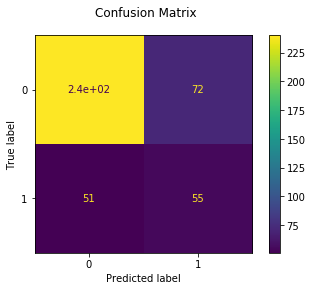

In [270]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Now predict the value of the digit on the test set:
y_pred_test = dt_clf.predict(X_test)


# Display the testing results
acc = accuracy_score(y_test, y_pred_test)
print("The prediction accuracy: {:.2f} %".format(acc * 100))

disp = plot_confusion_matrix(dt_clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

### random forest 

The prediction accuracy: 72.49 %


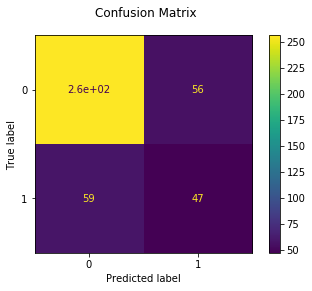

In [272]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

# Now predict the value of the digit on the test set:
y_pred_test = rf_clf.predict(X_test)


# Display the testing results
acc = accuracy_score(y_test, y_pred_test)
print("The prediction accuracy: {:.2f} %".format(acc * 100))

disp = plot_confusion_matrix(rf_clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

### gradient boosted decision tree classifier

The prediction accuracy: 73.21 %


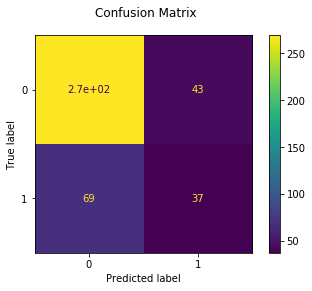

In [275]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt_clf = GradientBoostingClassifier(n_estimators=100)
gbdt_clf.fit(X_train, y_train)  
y_pred_test = gbdt_clf.predict(X_test)  

# Now predict the value of the digit on the test set:
y_pred_test = gbdt_clf.predict(X_test)


# Display the testing results
acc = accuracy_score(y_test, y_pred_test)
print("The prediction accuracy: {:.2f} %".format(acc * 100))

disp = plot_confusion_matrix(gbdt_clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")

plt.show()
